In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, matthews_corrcoef
import joblib

# Duyarlılık (Sensitivity) ve özgüllük (Specificity) hesaplama fonksiyonları
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    return accuracy, f1, sensitivity, specificity, mcc

# Eğitim verileri ve model eğitim kısmı
def train_svm_model(train_file_path):
    # Veriyi yükleme
    data = pd.read_csv(train_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    data = data.iloc[:, 1:]
    
    # Veri hazırlığı
    X = data.drop(columns=['Class']).values
    y = data['Class'].values
    
    # Veriyi eğitim ve test setlerine bölme
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # SVM modeli eğitme
    svm_model = SVC()
    svm_model.fit(X_train_scaled, y_train)
    
    # SVM modeli ve ölçekleyiciyi kaydetme
    joblib.dump(svm_model, 'svm_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    
    # Eğitim seti ile sonuçları değerlendirme
    y_pred = svm_model.predict(X_test_scaled)
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Eğitim Doğruluk Oranı: {accuracy}")
    print(f"Eğitim F1-Score: {f1}")
    print(f"Eğitim Sensitivity (Sn): {sensitivity}")
    print(f"Eğitim Specificity (Sp): {specificity}")
    print(f"Eğitim MCC: {mcc}")
    print(f"Eğitim Sınıflandırma Raporu:\n{report}")

# Test verileri ile modelin test edilmesi
def test_svm_model(test_file_path):
    # Test verilerini yükleme
    test_data = pd.read_csv(test_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    test_data = test_data.iloc[:, 1:]
    
    # Veri hazırlığı
    X_test = test_data.drop(columns=['Class']).values
    y_test = test_data['Class'].values
    
    # Model ve ölçekleyiciyi yükleme
    svm_model = joblib.load('svm_model.pkl')
    scaler = joblib.load('scaler.pkl')
    
    # Veriyi ölçeklendirme
    X_test_scaled = scaler.transform(X_test)
    
    # Tahmin yapma
    y_pred = svm_model.predict(X_test_scaled)
    
    # Sonuçları değerlendirme
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Test Doğruluk Oranı: {accuracy}")
    print(f"Test F1-Score: {f1}")
    print(f"Test Sensitivity (Sn): {sensitivity}")
    print(f"Test Specificity (Sp): {specificity}")
    print(f"Test MCC: {mcc}")
    print(f"Test Sınıflandırma Raporu:\n{report}")

# Eğitim ve test dosyalarının yollarını belirtme
train_file_path = 'UniRep_Train_SMOTE_lgbmSF.csv'
test_file_path = 'UniRep_Test_SMOTE_lgbmSF.csv'

# Model eğitimi
train_svm_model(train_file_path)

# Modelin test edilmesi
test_svm_model(test_file_path)



Eğitim Doğruluk Oranı: 0.8505747126436781
Eğitim F1-Score: 0.8761904761904762
Eğitim Sensitivity (Sn): 0.8846153846153846
Eğitim Specificity (Sp): 0.8
Eğitim MCC: 0.6880261660158816
Eğitim Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.87      0.88      0.88        52

    accuracy                           0.85        87
   macro avg       0.85      0.84      0.84        87
weighted avg       0.85      0.85      0.85        87

Test Doğruluk Oranı: 0.890625
Test F1-Score: 0.7741935483870968
Test Sensitivity (Sn): 0.9230769230769231
Test Specificity (Sp): 0.8823529411764706
Test MCC: 0.7207245645602223
Test Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        51
           1       0.67      0.92      0.77        13

    accuracy                           0.89        64
   macro avg       0.82      0.90      0

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, matthews_corrcoef
import joblib

# Duyarlılık (Sensitivity) ve özgüllük (Specificity) hesaplama fonksiyonları
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    return accuracy, f1, sensitivity, specificity, mcc

# Eğitim verileri ve model eğitim kısmı
def train_gb_model(train_file_path):
    # Veriyi yükleme
    data = pd.read_csv(train_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    data = data.iloc[:, 1:]
    
    # Veri hazırlığı
    X = data.drop(columns=['Class']).values
    y = data['Class'].values
    
    # Veriyi eğitim ve test setlerine bölme
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Gradient Boosting modeli eğitme
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train_scaled, y_train)
    
    # Modeli ve ölçekleyiciyi kaydetme
    joblib.dump(gb_model, 'gb_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    
    # Eğitim seti ile sonuçları değerlendirme
    y_pred = gb_model.predict(X_test_scaled)
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Eğitim Doğruluk Oranı: {accuracy}")
    print(f"Eğitim F1-Score: {f1}")
    print(f"Eğitim Sensitivity (Sn): {sensitivity}")
    print(f"Eğitim Specificity (Sp): {specificity}")
    print(f"Eğitim MCC: {mcc}")
    print(f"Eğitim Sınıflandırma Raporu:\n{report}")

# Test verileri ile modelin test edilmesi
def test_gb_model(test_file_path):
    # Test verilerini yükleme
    test_data = pd.read_csv(test_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    test_data = test_data.iloc[:, 1:]
    
    # Veri hazırlığı
    X_test = test_data.drop(columns=['Class']).values
    y_test = test_data['Class'].values
    
    # Model ve ölçekleyiciyi yükleme
    gb_model = joblib.load('gb_model.pkl')
    scaler = joblib.load('scaler.pkl')
    
    # Veriyi ölçeklendirme
    X_test_scaled = scaler.transform(X_test)
    
    # Tahmin yapma
    y_pred = gb_model.predict(X_test_scaled)
    
    # Sonuçları değerlendirme
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Test Doğruluk Oranı: {accuracy}")
    print(f"Test F1-Score: {f1}")
    print(f"Test Sensitivity (Sn): {sensitivity}")
    print(f"Test Specificity (Sp): {specificity}")
    print(f"Test MCC: {mcc}")
    print(f"Test Sınıflandırma Raporu:\n{report}")

# Eğitim ve test dosyalarının yollarını belirtme
train_file_path = 'UniRep_Train_SMOTE_lgbmSF.csv'
test_file_path = 'UniRep_Test_SMOTE_lgbmSF.csv'

# Model eğitimi
train_gb_model(train_file_path)

# Modelin test edilmesi
test_gb_model(test_file_path)


Eğitim Doğruluk Oranı: 0.8735632183908046
Eğitim F1-Score: 0.8910891089108911
Eğitim Sensitivity (Sn): 0.8653846153846154
Eğitim Specificity (Sp): 0.8857142857142857
Eğitim MCC: 0.7425795453715297
Eğitim Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.92      0.87      0.89        52

    accuracy                           0.87        87
   macro avg       0.87      0.88      0.87        87
weighted avg       0.88      0.87      0.87        87

Test Doğruluk Oranı: 0.921875
Test F1-Score: 0.8387096774193549
Test Sensitivity (Sn): 1.0
Test Specificity (Sp): 0.9019607843137255
Test MCC: 0.8071035385899118
Test Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        51
           1       0.72      1.00      0.84        13

    accuracy                           0.92        64
   macro avg       0.86      0.95      0

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, matthews_corrcoef
import joblib

# Duyarlılık (Sensitivity) ve özgüllük (Specificity) hesaplama fonksiyonları
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    return accuracy, f1, sensitivity, specificity, mcc

# Eğitim verileri ve model eğitim kısmı
def train_lr_model(train_file_path):
    # Veriyi yükleme
    data = pd.read_csv(train_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    data = data.iloc[:, 1:]
    
    # Veri hazırlığı
    X = data.drop(columns=['Class']).values
    y = data['Class'].values
    
    # Veriyi eğitim ve test setlerine bölme
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Logistic Regression modeli eğitme
    lr_model = LogisticRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # Modeli ve ölçekleyiciyi kaydetme
    joblib.dump(lr_model, 'lr_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    
    # Eğitim seti ile sonuçları değerlendirme
    y_pred = lr_model.predict(X_test_scaled)
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Eğitim Doğruluk Oranı: {accuracy}")
    print(f"Eğitim F1-Score: {f1}")
    print(f"Eğitim Sensitivity (Sn): {sensitivity}")
    print(f"Eğitim Specificity (Sp): {specificity}")
    print(f"Eğitim MCC: {mcc}")
    print(f"Eğitim Sınıflandırma Raporu:\n{report}")

# Test verileri ile modelin test edilmesi
def test_lr_model(test_file_path):
    # Test verilerini yükleme
    test_data = pd.read_csv(test_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    test_data = test_data.iloc[:, 1:]
    
    # Veri hazırlığı
    X_test = test_data.drop(columns=['Class']).values
    y_test = test_data['Class'].values
    
    # Model ve ölçekleyiciyi yükleme
    lr_model = joblib.load('lr_model.pkl')
    scaler = joblib.load('scaler.pkl')
    
    # Veriyi ölçeklendirme
    X_test_scaled = scaler.transform(X_test)
    
    # Tahmin yapma
    y_pred = lr_model.predict(X_test_scaled)
    
    # Sonuçları değerlendirme
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Test Doğruluk Oranı: {accuracy}")
    print(f"Test F1-Score: {f1}")
    print(f"Test Sensitivity (Sn): {sensitivity}")
    print(f"Test Specificity (Sp): {specificity}")
    print(f"Test MCC: {mcc}")
    print(f"Test Sınıflandırma Raporu:\n{report}")

# Eğitim ve test dosyalarının yollarını belirtme
train_file_path = 'UniRep_Train_SMOTE_lgbmSF.csv'
test_file_path = 'UniRep_Test_SMOTE_lgbmSF.csv'

# Model eğitimi
train_lr_model(train_file_path)

# Modelin test edilmesi
test_lr_model(test_file_path)


Eğitim Doğruluk Oranı: 0.9310344827586207
Eğitim F1-Score: 0.9433962264150944
Eğitim Sensitivity (Sn): 0.9615384615384616
Eğitim Specificity (Sp): 0.8857142857142857
Eğitim MCC: 0.856238654315859
Eğitim Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.93      0.96      0.94        52

    accuracy                           0.93        87
   macro avg       0.93      0.92      0.93        87
weighted avg       0.93      0.93      0.93        87

Test Doğruluk Oranı: 0.921875
Test F1-Score: 0.8148148148148148
Test Sensitivity (Sn): 0.8461538461538461
Test Specificity (Sp): 0.9411764705882353
Test MCC: 0.7662398219686337
Test Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.79      0.85      0.81        13

    accuracy                           0.92        64
   macro avg       0.87   

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, matthews_corrcoef
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import joblib

# Duyarlılık (Sensitivity) ve özgüllük (Specificity) hesaplama fonksiyonları
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    return accuracy, f1, sensitivity, specificity, mcc

# Eğitim verileri ve model eğitim kısmı
def train_ann_model(train_file_path):
    # Veriyi yükleme
    data = pd.read_csv(train_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    data = data.iloc[:, 1:]
    
    # Veri hazırlığı
    X = data.drop(columns=['Class']).values
    y = data['Class'].values
    
    # Veriyi eğitim ve test setlerine bölme
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # ANN modeli tanımlama
    ann_model = Sequential()
    ann_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    ann_model.add(Dense(32, activation='relu'))
    ann_model.add(Dense(1, activation='sigmoid'))
    
    # Modeli derleme
    ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Modeli eğitme
    ann_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)
    
    # Modeli ve ölçekleyiciyi kaydetme
    ann_model.save('ann_model.h5')
    joblib.dump(scaler, 'scaler.pkl')
    
    # Eğitim seti ile sonuçları değerlendirme
    y_pred_train = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred_train)
    report = classification_report(y_test, y_pred_train)
    
    print(f"Eğitim Doğruluk Oranı: {accuracy}")
    print(f"Eğitim F1-Score: {f1}")
    print(f"Eğitim Sensitivity (Sn): {sensitivity}")
    print(f"Eğitim Specificity (Sp): {specificity}")
    print(f"Eğitim MCC: {mcc}")
    print(f"Eğitim Sınıflandırma Raporu:\n{report}")

# Test verileri ile modelin test edilmesi
def test_ann_model(test_file_path):
    # Test verilerini yükleme
    test_data = pd.read_csv(test_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    test_data = test_data.iloc[:, 1:]
    
    # Veri hazırlığı
    X_test = test_data.drop(columns=['Class']).values
    y_test = test_data['Class'].values
    
    # Model ve ölçekleyiciyi yükleme
    ann_model = load_model('ann_model.h5')
    scaler = joblib.load('scaler.pkl')
    
    # Veriyi ölçeklendirme
    X_test_scaled = scaler.transform(X_test)
    
    # Tahmin yapma
    y_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")
    
    # Sonuçları değerlendirme
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Test Doğruluk Oranı: {accuracy}")
    print(f"Test F1-Score: {f1}")
    print(f"Test Sensitivity (Sn): {sensitivity}")
    print(f"Test Specificity (Sp): {specificity}")
    print(f"Test MCC: {mcc}")
    print(f"Test Sınıflandırma Raporu:\n{report}")

# Eğitim ve test dosyalarının yollarını belirtme
train_file_path = 'UniRep_Train_SMOTE_lgbmSF.csv'
test_file_path = 'UniRep_Test_SMOTE_lgbmSF.csv'

# Model eğitimi
train_ann_model(train_file_path)

# Modelin test edilmesi
test_ann_model(test_file_path)


/Users/ahmetfarukeken/Downloads/Biyoinformatik/code/golgiDF-main/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/30
9/9 [==============================] - 0s 11ms/step - loss: 0.6606 - accuracy: 0.5993 - val_loss: 0.5983 - val_accuracy: 0.7429
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.8159 - val_loss: 0.5631 - val_accuracy: 0.7000
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8267 - val_loss: 0.5483 - val_accuracy: 0.7286
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8520 - val_loss: 0.5299 - val_accuracy: 0.7429
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8628 - val_loss: 0.5318 - val_accuracy: 0.7286
Epoch 6/30
9/9 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8953 - val_loss: 0.5137 - val_accuracy: 0.7429
Epoch 7/30
9/9 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.9170 - val_loss: 0.5049 - val_accuracy: 0.7714
Epoch 8/30
9/9 [=================

/Users/ahmetfarukeken/Downloads/Biyoinformatik/code/golgiDF-main/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, matthews_corrcoef
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import joblib

# Duyarlılık (Sensitivity) ve özgüllük (Specificity) hesaplama fonksiyonları
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_true, y_pred)
    
    return accuracy, f1, sensitivity, specificity, mcc

# Veriyi 1D CNN ile işlemek için yeniden şekillendirme fonksiyonu
def reshape_data(X):
    return np.expand_dims(X, axis=-1)

# Eğitim verileri ve model eğitim kısmı
def train_cnn_model(train_file_path):
    # Veriyi yükleme
    data = pd.read_csv(train_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    data = data.iloc[:, 1:]
    
    # Veri hazırlığı
    X = data.drop(columns=['Class']).values
    y = data['Class'].values
    
    # Veriyi eğitim ve test setlerine bölme
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Veriyi ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Veriyi yeniden şekillendirme
    X_train_reshaped = reshape_data(X_train_scaled)
    X_test_reshaped = reshape_data(X_test_scaled)
    
    # CNN modelini tanımlama
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    # Modeli derleme
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Modeli eğitme
    model.fit(X_train_reshaped, y_train, epochs=200, batch_size=32, validation_split=0.2)
    
    # Modeli ve ölçekleyiciyi kaydetme
    model.save('cnn_model.h5')
    joblib.dump(scaler, 'scaler.pkl')
    
    # Eğitim seti ile sonuçları değerlendirme
    y_pred_train = (model.predict(X_test_reshaped) > 0.5).astype("int32")
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred_train)
    report = classification_report(y_test, y_pred_train)
    
    print(f"Eğitim Doğruluk Oranı: {accuracy}")
    print(f"Eğitim F1-Score: {f1}")
    print(f"Eğitim Sensitivity (Sn): {sensitivity}")
    print(f"Eğitim Specificity (Sp): {specificity}")
    print(f"Eğitim MCC: {mcc}")
    print(f"Eğitim Sınıflandırma Raporu:\n{report}")

# Test verileri ile modelin test edilmesi
def test_cnn_model(test_file_path):
    # Test verilerini yükleme
    test_data = pd.read_csv(test_file_path)
    
    # İlk sütunu (index sütunu) kaldırma
    test_data = test_data.iloc[:, 1:]
    
    # Veri hazırlığı
    X_test = test_data.drop(columns=['Class']).values
    y_test = test_data['Class'].values
    
    # Model ve ölçekleyiciyi yükleme
    model = load_model('cnn_model.h5')
    scaler = joblib.load('scaler.pkl')
    
    # Veriyi ölçeklendirme
    X_test_scaled = scaler.transform(X_test)
    
    # Veriyi yeniden şekillendirme
    X_test_reshaped = reshape_data(X_test_scaled)
    
    # Tahmin yapma
    y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
    
    # Sonuçları değerlendirme
    accuracy, f1, sensitivity, specificity, mcc = calculate_metrics(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Test Doğruluk Oranı: {accuracy}")
    print(f"Test F1-Score: {f1}")
    print(f"Test Sensitivity (Sn): {sensitivity}")
    print(f"Test Specificity (Sp): {specificity}")
    print(f"Test MCC: {mcc}")
    print(f"Test Sınıflandırma Raporu:\n{report}")

# Eğitim ve test dosyalarının yollarını belirtme
train_file_path = 'UniRep_Train_SMOTE_lgbmSF.csv'
test_file_path = 'UniRep_Test_SMOTE_lgbmSF.csv'

# Model eğitimi
train_cnn_model(train_file_path)

# Modelin test edilmesi
test_cnn_model(test_file_path)


Epoch 1/200
9/9 [==============================] - 0s 14ms/step - loss: 0.6069 - accuracy: 0.6318 - val_loss: 0.5830 - val_accuracy: 0.7429
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.4483 - accuracy: 0.8087 - val_loss: 0.5854 - val_accuracy: 0.7571
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3735 - accuracy: 0.8412 - val_loss: 0.5316 - val_accuracy: 0.7571
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3582 - accuracy: 0.8195 - val_loss: 0.6095 - val_accuracy: 0.7286
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.3069 - accuracy: 0.8700 - val_loss: 0.5355 - val_accuracy: 0.7714
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2571 - accuracy: 0.9025 - val_loss: 0.6033 - val_accuracy: 0.8143
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.9314 - val_loss: 0.5546 - val_accuracy: 0.7714
Epoch 8/200
9/9 [=========

/Users/ahmetfarukeken/Downloads/Biyoinformatik/code/golgiDF-main/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


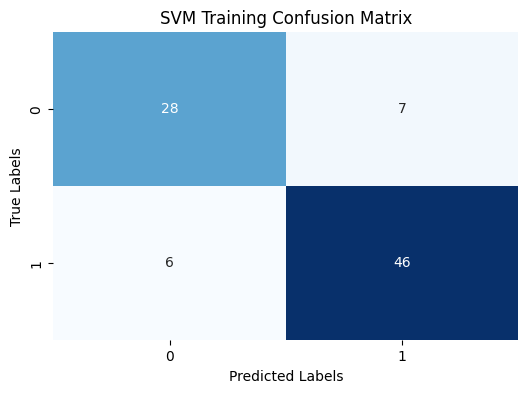

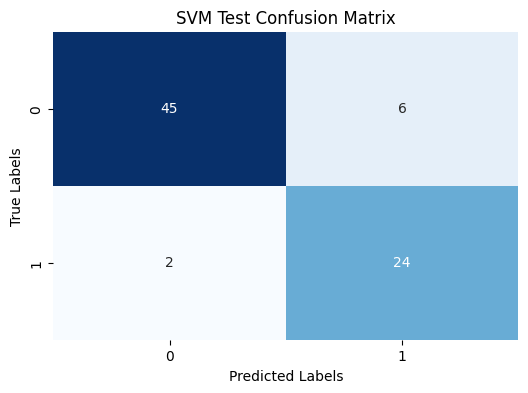

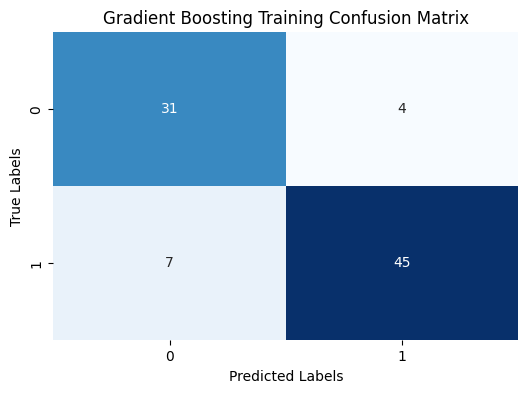

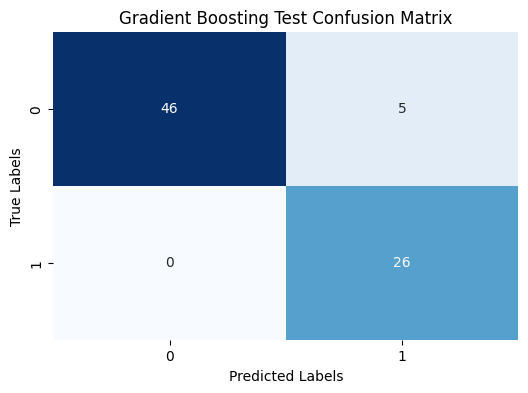

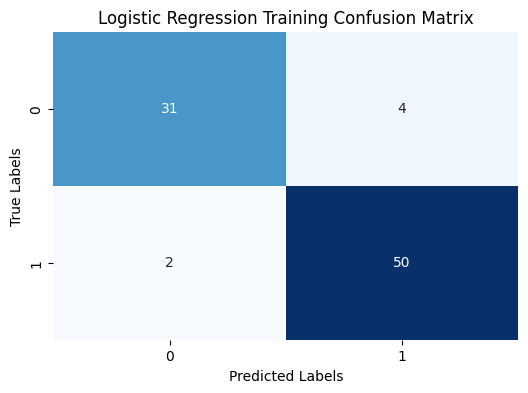

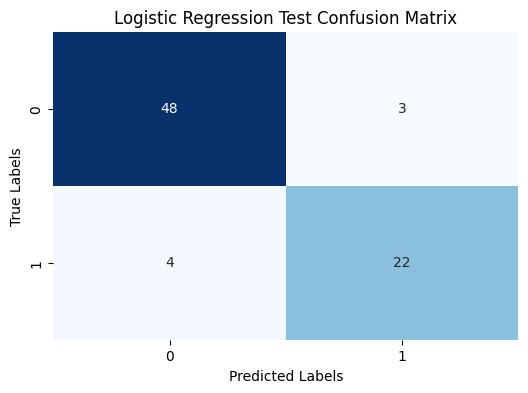

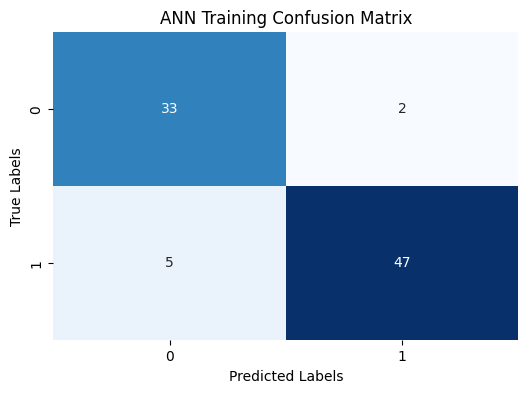

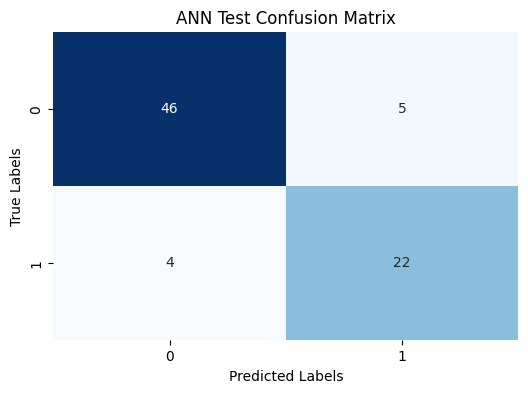

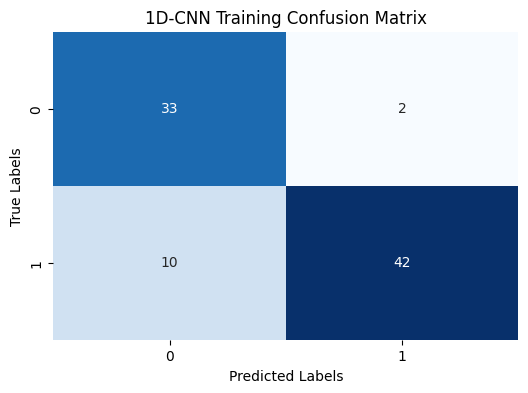

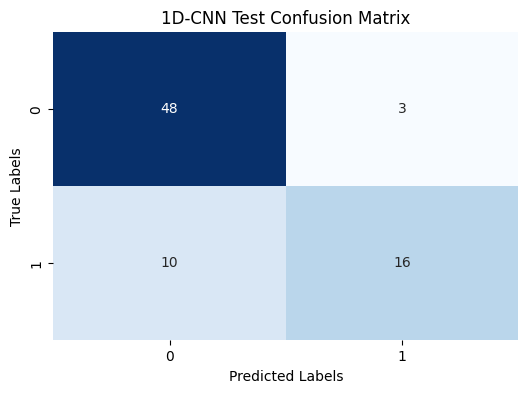

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Verilen değerler doğrultusunda confusion matrix oluşturma fonksiyonu
def create_confusion_matrix(sensitivity, specificity, total_positives, total_negatives):
    tp = int(sensitivity * total_positives)
    fn = total_positives - tp
    tn = int(specificity * total_negatives)
    fp = total_negatives - tn
    return np.array([[tn, fp], [fn, tp]])

# Eğitim ve test verileri için toplam pozitif ve negatif değerler
total_positives_train = 52  # Toplam pozitif örnek sayısı (eğitim)
total_negatives_train = 35  # Toplam negatif örnek sayısı (eğitim)
total_positives_test = 26   # Toplam pozitif örnek sayısı (test)
total_negatives_test = 51   # Toplam negatif örnek sayısı (test)

# SVM Confusion Matrix
svm_train_cm = create_confusion_matrix(0.8846153846153846, 0.8, total_positives_train, total_negatives_train)
svm_test_cm = create_confusion_matrix(0.9230769230769231, 0.8823529411764706, total_positives_test, total_negatives_test)

# Gradient Boosting Confusion Matrix
gb_train_cm = create_confusion_matrix(0.8653846153846154, 0.8857142857142857, total_positives_train, total_negatives_train)
gb_test_cm = create_confusion_matrix(1.0, 0.9019607843137255, total_positives_test, total_negatives_test)

# Logistic Regression Confusion Matrix
lr_train_cm = create_confusion_matrix(0.9615384615384616, 0.8857142857142857, total_positives_train, total_negatives_train)
lr_test_cm = create_confusion_matrix(0.8461538461538461, 0.9411764705882353, total_positives_test, total_negatives_test)

# ANN Confusion Matrix
ann_train_cm = create_confusion_matrix(0.9038461538461539, 0.9428571428571428, total_positives_train, total_negatives_train)
ann_test_cm = create_confusion_matrix(0.8461538461538461, 0.9019607843137255, total_positives_test, total_negatives_test)

# 1D-CNN Confusion Matrix
cnn_train_cm = create_confusion_matrix(0.8076923076923077, 0.9428571428571428, total_positives_train, total_negatives_train)
cnn_test_cm = create_confusion_matrix(0.6153846153846154, 0.9411764705882353, total_positives_test, total_negatives_test)

# Confusion matrix çizim fonksiyonu
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# SVM
plot_confusion_matrix(svm_train_cm, "SVM Training Confusion Matrix")
plot_confusion_matrix(svm_test_cm, "SVM Test Confusion Matrix")

# Gradient Boosting
plot_confusion_matrix(gb_train_cm, "Gradient Boosting Training Confusion Matrix")
plot_confusion_matrix(gb_test_cm, "Gradient Boosting Test Confusion Matrix")

# Logistic Regression
plot_confusion_matrix(lr_train_cm, "Logistic Regression Training Confusion Matrix")
plot_confusion_matrix(lr_test_cm, "Logistic Regression Test Confusion Matrix")

# ANN
plot_confusion_matrix(ann_train_cm, "ANN Training Confusion Matrix")
plot_confusion_matrix(ann_test_cm, "ANN Test Confusion Matrix")

# 1D-CNN
plot_confusion_matrix(cnn_train_cm, "1D-CNN Training Confusion Matrix")
plot_confusion_matrix(cnn_test_cm, "1D-CNN Test Confusion Matrix")
